In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import Quantum_Interpreter as qi
import itertools
from qutip import Bloch

In [3]:
def give_prob(state, state_dict):
    '''Little helper function to give the probability of all states'''
    for i, k in enumerate(state_dict.keys()):
        state_dict[k] = state[i]
    return state_dict

In [16]:
def get_Bloch_coords_single(state):
    '''Returns the Bloch coordinates of a single state'''
    alpha = state[0]
    beta = state[1]
    a, t = np.abs(alpha), np.angle(alpha)
    b, p = np.abs(beta), np.angle(beta)
    p -= t
    theta = 2*np.arccos(a)
    phi = p
    return np.cos(phi)*np.sin(theta), np.sin(phi)*np.sin(theta), np.cos(theta)

def get_Bloch_coords(states):
    '''Returns the Bloch coordinates of a list of states'''
    if len(states) == 2:
        return get_Bloch_coords_single(states)
    else:
        coords = []
        # to do: the way multiple states are handled is by giving the probability of each total state,
        # meaning prob of [0,0], prob of [0,1], etc. The way get_Bloch_coords_single is written, it needs the prob divided for each single state
        return coords

# Bell state test

In [24]:
N_qubits = 2
state_dict = {}
for i,el in enumerate(itertools.product([0, 1], repeat=N_qubits)):
    state_dict[f'P of state {i} {el}'] = 0
state_dict

{'P of state 0 (0, 0)': 0,
 'P of state 1 (0, 1)': 0,
 'P of state 2 (1, 0)': 0,
 'P of state 3 (1, 1)': 0}

In [25]:
m = type('obj', (object,), {'quantum_state' : qi.make_quantum_state(N_qubits), 'quantum_state_register' : 0})
give_prob(m.quantum_state, state_dict)

{'P of state 0 (0, 0)': 1.0,
 'P of state 1 (0, 1)': 0.0,
 'P of state 2 (1, 0)': 0.0,
 'P of state 3 (1, 1)': 0.0}

In [26]:
m = qi.run_quantum_program(qi.bell(0,1), m)

In [27]:
give_prob(m.quantum_state, state_dict)

{'P of state 0 (0, 0)': 0.7071067811865475,
 'P of state 1 (0, 1)': 0.0,
 'P of state 2 (1, 0)': 0.0,
 'P of state 3 (1, 1)': 0.7071067811865475}

In [13]:
m.quantum_state

array([0.70710678, 0.        , 0.        , 0.70710678])

In [70]:
qi.observe(m)
m.quantum_state_register

0

In [78]:
test = [0,0,0,0]
runs = 50000
m = type('obj', (object,), {'quantum_state' : qi.make_quantum_state(2), 'quantum_state_register' : 0})
for i in range(runs):
    m = qi.run_quantum_program(qi.bell(0,1), m)
    qi.observe(m)
    test[m.quantum_state_register] += 1
    m.quantum_state = qi.make_quantum_state(2)
    m.quantum_state_register = 0
test = np.array(test)/runs
print(test)


[0.50126 0.      0.      0.49874]


# Greenberger–Horne–Zeilinger

In [102]:
N_qubits = 6
m = type('obj', (object,), {'quantum_state' : qi.make_quantum_state(N_qubits), 'quantum_state_register' : 0})
m = qi.run_quantum_program(qi.ghz(N_qubits), m)

In [103]:
m.quantum_state

array([0.70710678, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.70710678])

In [104]:
qi.observe(m)
m.quantum_state_register

63

In [105]:
m.quantum_state

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

# Entanglement swapping

In [6]:
N_qubits = 3
state_dict = {}
for i,el in enumerate(itertools.product([0, 1], repeat=N_qubits)):
    state_dict[f'P of state {i} {el}'] = 0
state_dict

{'P of state 0 (0, 0, 0)': 0,
 'P of state 1 (0, 0, 1)': 0,
 'P of state 2 (0, 1, 0)': 0,
 'P of state 3 (0, 1, 1)': 0,
 'P of state 4 (1, 0, 0)': 0,
 'P of state 5 (1, 0, 1)': 0,
 'P of state 6 (1, 1, 0)': 0,
 'P of state 7 (1, 1, 1)': 0}

In [7]:
m = type('obj', (object,), {'quantum_state' : qi.make_quantum_state(N_qubits), 'quantum_state_register' : 0})
give_prob(m.quantum_state, state_dict)


{'P of state 0 (0, 0, 0)': 1.0,
 'P of state 1 (0, 0, 1)': 0.0,
 'P of state 2 (0, 1, 0)': 0.0,
 'P of state 3 (0, 1, 1)': 0.0,
 'P of state 4 (1, 0, 0)': 0.0,
 'P of state 5 (1, 0, 1)': 0.0,
 'P of state 6 (1, 1, 0)': 0.0,
 'P of state 7 (1, 1, 1)': 0.0}

In [8]:
m = qi.run_quantum_program(qi.entanglement_swap_3q(0,1,2), m)

In [9]:
give_prob(m.quantum_state, state_dict)

{'P of state 0 (0, 0, 0)': 0.4999999999999999,
 'P of state 1 (0, 0, 1)': 0.0,
 'P of state 2 (0, 1, 0)': 0.4999999999999999,
 'P of state 3 (0, 1, 1)': 0.0,
 'P of state 4 (1, 0, 0)': 0.0,
 'P of state 5 (1, 0, 1)': 0.4999999999999999,
 'P of state 6 (1, 1, 0)': 0.0,
 'P of state 7 (1, 1, 1)': -0.4999999999999999}

In [10]:
qi.observe(m)
give_prob(m.quantum_state, state_dict)

{'P of state 0 (0, 0, 0)': 0.0,
 'P of state 1 (0, 0, 1)': 0.0,
 'P of state 2 (0, 1, 0)': 0.0,
 'P of state 3 (0, 1, 1)': 0.0,
 'P of state 4 (1, 0, 0)': 0.0,
 'P of state 5 (1, 0, 1)': 1.0,
 'P of state 6 (1, 1, 0)': 0.0,
 'P of state 7 (1, 1, 1)': 0.0}

# Rotations with Pauli's gates

## Y

In [154]:
N_qubits = 1
state_dict = {}
for i,el in enumerate(itertools.product([0, 1], repeat=N_qubits)):
    state_dict[f'P of state {i} {el}'] = 0
state_dict

{'P of state 0 (0,)': 0, 'P of state 1 (1,)': 0}

In [155]:
m = type('obj', (object,), {'quantum_state' : qi.make_quantum_state(N_qubits), 'quantum_state_register' : 0})

In [156]:
give_prob(m.quantum_state, state_dict)

{'P of state 0 (0,)': 1.0, 'P of state 1 (1,)': 0.0}

In [157]:
m = qi.run_quantum_program(qi.pauli_y(0), m)

In [158]:
give_prob(m.quantum_state, state_dict)

{'P of state 0 (0,)': -0.7071067811865475j,
 'P of state 1 (1,)': 0.7071067811865475j}

## Z

In [149]:
N_qubits = 1
state_dict = {}
for i,el in enumerate(itertools.product([0, 1], repeat=N_qubits)):
    state_dict[f'P of state {i} {el}'] = 0
state_dict

{'P of state 0 (0,)': 0, 'P of state 1 (1,)': 0}

In [150]:
m = type('obj', (object,), {'quantum_state' : qi.make_quantum_state(N_qubits), 'quantum_state_register' : 0})

In [151]:
give_prob(m.quantum_state, state_dict)

{'P of state 0 (0,)': 1.0, 'P of state 1 (1,)': 0.0}

In [152]:
m = qi.run_quantum_program(qi.pauli_z(0), m)

In [153]:
give_prob(m.quantum_state, state_dict)

{'P of state 0 (0,)': 0.7071067811865475,
 'P of state 1 (1,)': -0.7071067811865475}

## Rotations Operators

In [11]:
N_qubits = 1
state_dict = {}
for i,el in enumerate(itertools.product([0, 1], repeat=N_qubits)):
    state_dict[f'P of state {i} {el}'] = 0
state_dict

{'P of state 0 (0,)': 0, 'P of state 1 (1,)': 0}

In [21]:
m = type('obj', (object,), {'quantum_state' : qi.make_quantum_state(N_qubits), 'quantum_state_register' : 0})

In [13]:
give_prob(m.quantum_state, state_dict)

{'P of state 0 (0,)': 1.0, 'P of state 1 (1,)': 0.0}

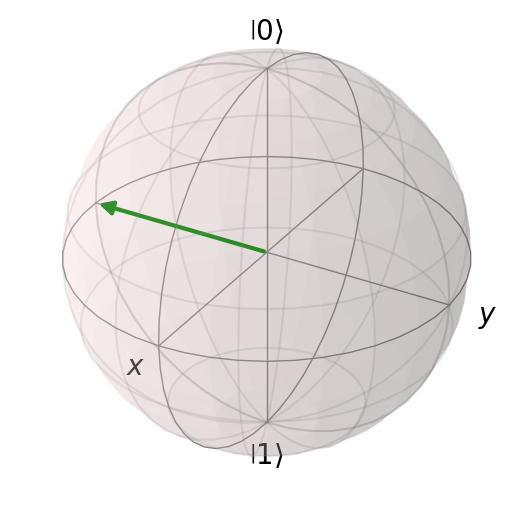

In [20]:
b = Bloch()
b.add_vectors(get_Bloch_coords_single(m.quantum_state))
b.show()

In [22]:
m = qi.run_quantum_program(qi.rotations(np.pi/2, 0, 0, 0), m)

[0.70710678+0.j         0.        -0.70710678j]


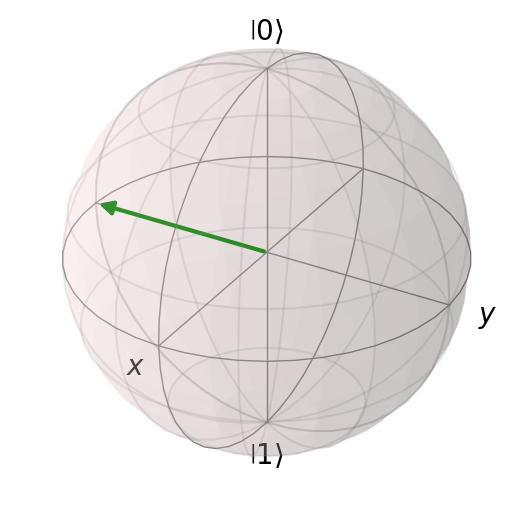

In [23]:
print(m.quantum_state)
b = Bloch()
b.add_vectors(get_Bloch_coords(m.quantum_state))
b.show()